In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
airline_df=pd.read_excel("airline.xlsx")
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

## EDA

In [3]:
airline_df.shape

(10683, 11)

In [4]:
airline_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
airline_df.info()    #only 1 null value present in both route and total_stops

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
airline_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [7]:
r=airline_df.describe(include="all")
r

#most preferred airline is jet airway   -->approx 30% people preffered these airways
##most preffered route is delhi to mumbai to cochin
##most peoples duration of the flight is 2h 50m


Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

## Null values

In [8]:
airline_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
airline_df[airline_df["Route"].isna()]


Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

In [10]:
airline_df["Route"].fillna("DEL--->BOM--->COk",inplace=True)


In [11]:
airline_df[airline_df["Total_Stops"].isna()]


Airline Date_of_Journey Source Destination              Route  \
9039  Air India       6/05/2019  Delhi      Cochin  DEL--->BOM--->COk   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
9039    09:45  09:25 07 May  23h 40m         NaN         No info   7480

In [12]:
airline_df["Total_Stops"].fillna("2 stops",inplace=True)


In [13]:
airline_df.isna().sum()    #done null values are filled--->now 0 null values in all columns.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
airline_df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [15]:
airline_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
airline_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## check outliers for price in airlines

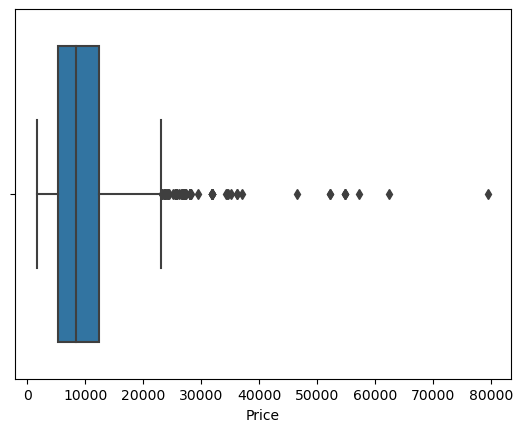

In [17]:
sns.boxplot(x="Price",data=airline_df)
plt.show()

In [18]:
cols=airline_df.columns
cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
print(airline_df.nunique())
cat_cols=[]
num_cols=[]
for i in airline_df:
    if airline_df[i].dtype=="object" and airline_df[i].nunique()<=12:
        cat_cols.append(i)
    else:
        num_cols.append(i)
        
print(cat_cols)
print(num_cols)

#more number of unique values it will go under numerical column
#less number of unique values it will come under categorical column

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64
['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']
['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price']


In [20]:
print(airline_df.nunique())
cat_cols1=[]
num_cols1=[]
for i in airline_df:
    if airline_df[i].dtype=="object":
        cat_cols1.append(i)
    else:
        num_cols1.append(i)
        
print(cat_cols1)
print(num_cols1)

#more number of unique values it will go under numerical column
#less number of unique values it will come under categorical column

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               129
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64
['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
['Price']


In [21]:
# try:
#     f,ax=plt.subplots(2,4,figsize=(18,10),dpi=100)

#     index=0

#     for i in range(2):
#         for j in range(4):
#             sns.boxplot(df[numeric_cols[index]],ax=ax[i,j])
#             ax[i,j].set_title(numeric_cols[index])
#             index+=1

#     plt.tight_layout()
#     plt.show()
# except:
#     pass

In [22]:
airline_df[num_cols1].corr()

Price
Price    1.0

In [23]:

import pandas as pd

data = {'Variable1': [1, 2, 3, 4, 5,7,8,9],
        'Variable2': [2, 4, 6, 8, 10,2,12,4]}

df = pd.DataFrame(data)

correlation_matrix = df.corr()

print(correlation_matrix)


           Variable1  Variable2
Variable1   1.000000   0.292632
Variable2   0.292632   1.000000


## Encoding

In [24]:
dummy=pd.get_dummies(airline_df,columns=["Total_Stops"])
dummy

#this is one-hot encoding -->pandas will take df and column name and it will take columns=number of unqiue values in the column

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Additional_Info  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m         No info   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m         No info   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h         No info   
3            CCU → NAG → BLR    18:05         23:30   5h 25m         No info   
4            BLR → NAG → DEL    16:50         21:35   4h 45m         No info   
...                      ...      ...           ...      ...             ...   
10678              CCU → BLR    19:55         22:25   2h 30m         No info   
10679              CCU → BLR    20:45         23:20   2h 35m         No info   
10680              BLR → DEL    08:20         11:20       3h         No info   
10681              BLR → DEL    11:30         14:10   2h 40m         No info   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m         No info   

       Price  Total_Stops_1 stop  Total_Stops_2 stops  Total_Stops_3 stops  \
0       3897               False                False                False   
1       7662               False                 True                False   
2      13882               False                 True                False   
3       6218                True                False                False   
4      13302                True                False                False   
...      ...                 ...                  ...                  ...   
10678   4107               False                False                False   
10679   4145               False                False                False   
10680   7229               False                False                False   
10681  12648               False                False                False   
10682  11753               False                 True                False   

       Total_Stops_4 stops  Total_Stops_non-stop  
0                    False                  True  
1                    False                 False  
2                    False                 False  
3                    False                 False  
4                    False                 False  
...                    ...                   ...  
10678                False                  True  
10679                False                  True  
10680                False                  True  
10681                False                  True  
10682                False                 False  

[10683 rows x 15 columns]

## Label encoding for the column total stops

In [25]:
# df_encode=airline_df["Total_Stops"].value_counts()
# df_encode


In [26]:
# df_encode_indexes=df_encode.index
df_encode_indexes=['non-stop','1 stop','2 stops', '3 stops', '4 stops']

In [27]:
d={}
for i in range(0,len(df_encode_indexes)):
    d[df_encode_indexes[i]]=i
print(d)    

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}


In [28]:
airline_df.Total_Stops.replace(d,inplace=True)

In [29]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [30]:
num_cols1.append("Total_Stops")

In [31]:
num_cols1

['Price', 'Total_Stops']

In [32]:


airline_df[num_cols1].corr()     #negative or close to zero correlation represents there is a weaker relation between the parameters we are considering

Price  Total_Stops
Price        1.000000     0.603751
Total_Stops  0.603751     1.000000

In [33]:
plt.figure(figsize=(8,5),dpi=100)
sns.heatmap(airline_df[num_cols1].corr(),annot=True,cmap='viridis')

<Axes: >

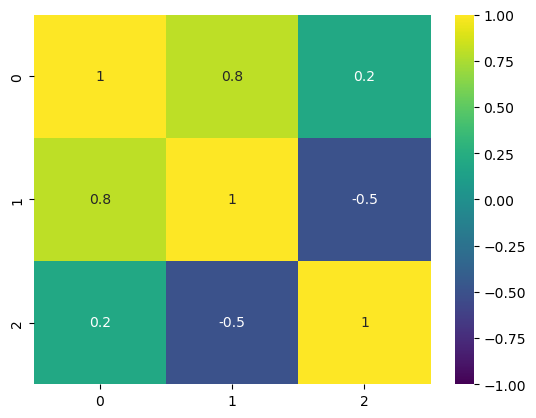

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [[1, 0.8, 0.2],
        [0.8, 1, -0.5],
        [0.2, -0.5, 1]]

# Create a heatmap
sns.heatmap(data, annot=True,cmap="viridis", vmin=-1, vmax=1)

# Display the plot
plt.show()


# Analysis of the airlines data set

In [35]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

## which Airways are more preferrable and least preferrable by people by travel

In [36]:
airline_df["Airline"].value_counts()

#Most preferrable is jet airways 
#least preferrable is Trujet


#Top 3 are 
#    1.Jet airways
#    2. Indigo
#    3 .Air India

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')


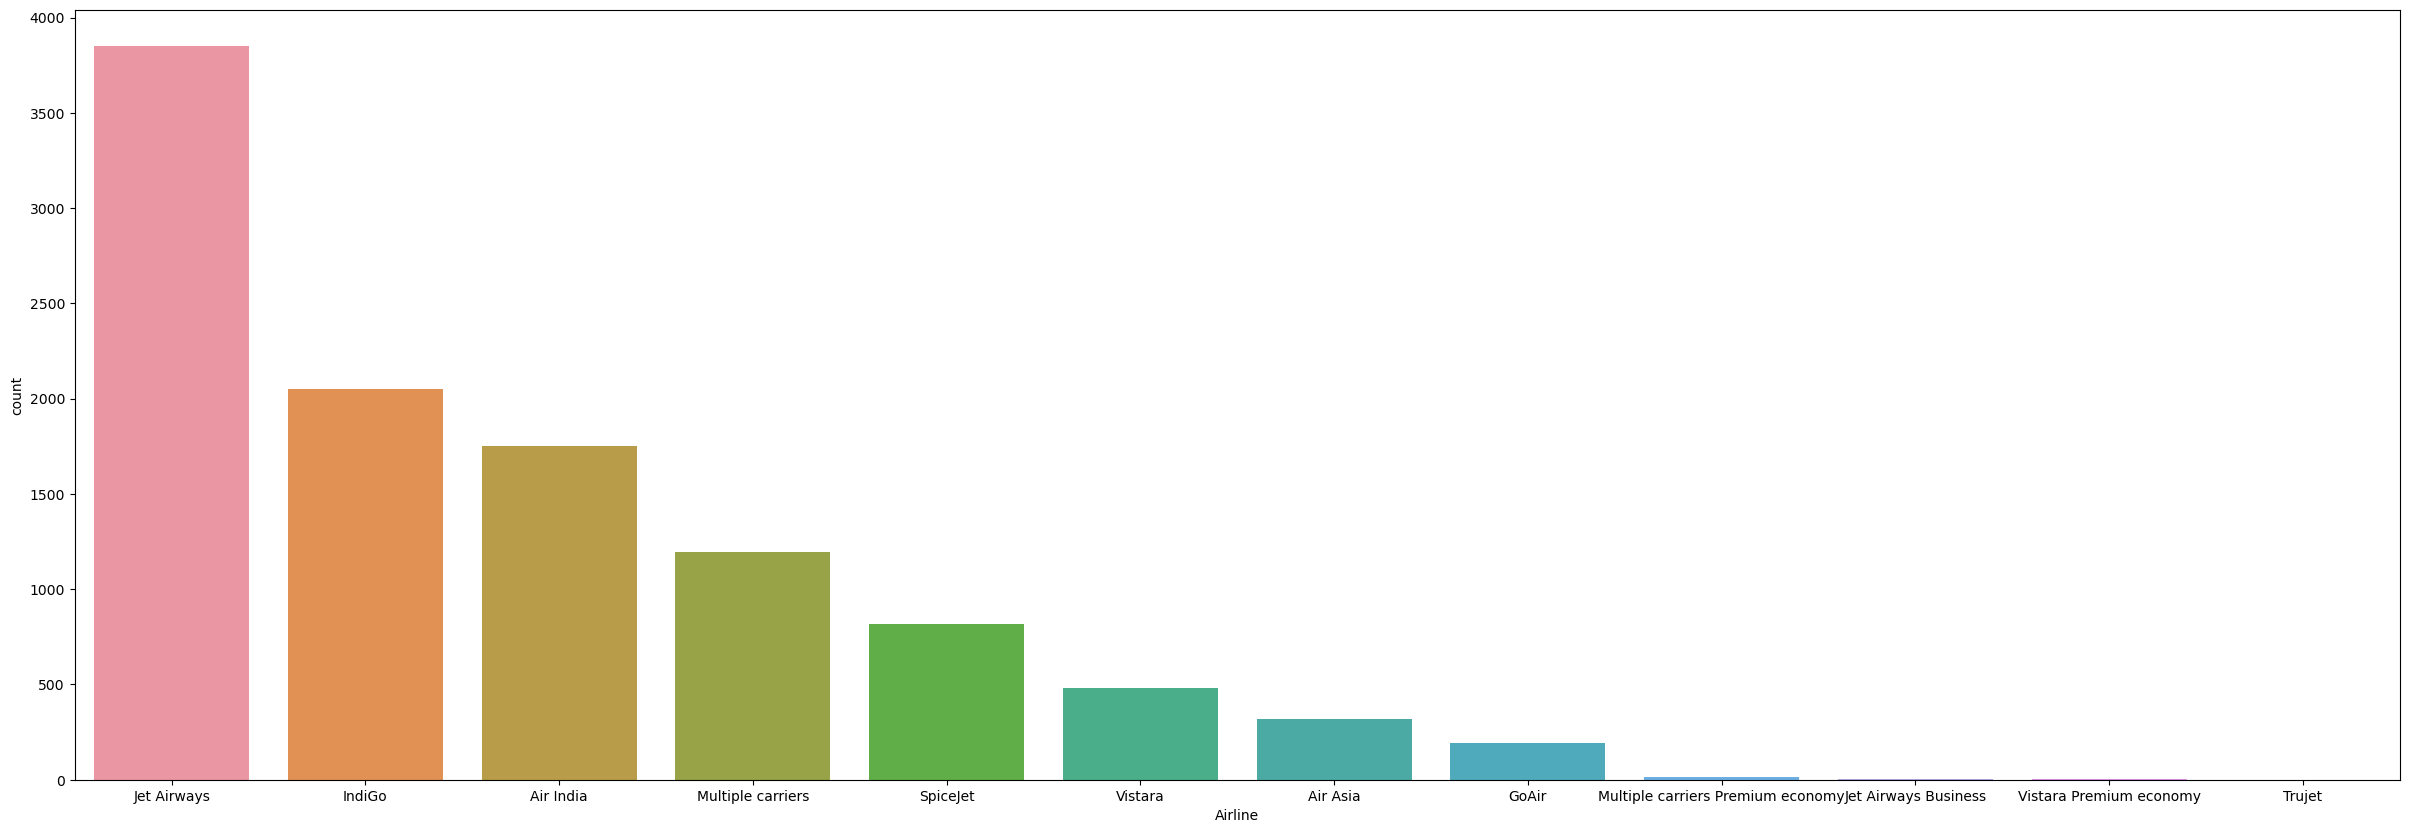

In [37]:
plt.figure(figsize=(30,10))
values=airline_df["Airline"].value_counts()
sorted_values=values.sort_values(ascending=False).index
print(sorted_values)
sns.countplot(x="Airline",data=airline_df,order=sorted_values)
plt.show()

##  99 percent people Ticket Price was less than 30000 

In [38]:
r=airline_df[airline_df["Price"]>=30000]
print(r.shape)
r

(24, 11)


Airline Date_of_Journey    Source Destination  \
396       Multiple carriers       1/03/2019     Delhi      Cochin   
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
1478            Jet Airways      18/03/2019  Banglore   New Delhi   
1629              Air India      01/03/2019  Banglore   New Delhi   
2099            Jet Airways      01/03/2019  Banglore   New Delhi   
2618            Jet Airways      18/03/2019  Banglore   New Delhi   
2693            Jet Airways      01/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
3700            Jet Airways      01/03/2019  Banglore   New Delhi   
5013            Jet Airways      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5439            Jet Airways      01/03/2019  Banglore   New Delhi   
5662            Jet Airways      01/03/2019  Banglore   New Delhi   
5719            Jet Airways      01/03/2019  Banglore   New Delhi   
6576            Jet Airways      01/03/2019  Banglore   New Delhi   
6991      Multiple carriers       9/05/2019     Delhi      Cochin   
7351   Jet Airways Business       3/03/2019     Delhi      Cochin   
7617      Multiple carriers       3/03/2019     Delhi      Cochin   
8598      Multiple carriers       9/03/2019     Delhi      Cochin   
9019            Jet Airways      01/03/2019  Banglore   New Delhi   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10052             Air India      24/03/2019   Kolkata    Banglore   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
396          DEL → BOM → COK    12:50         19:15   6h 25m            1   
657          BLR → BOM → DEL    05:45         10:45       5h            1   
1478         BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m            1   
1629   BLR → BOM → NAG → DEL    08:50  10:35 02 Mar  25h 45m            2   
2099         BLR → BOM → DEL    14:05         19:10    5h 5m            1   
2618         BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m            1   
2693         BLR → BOM → DEL    18:40  00:45 02 Mar    6h 5m            1   
2924         BLR → BOM → DEL    05:45         11:25   5h 40m            1   
3700         BLR → BOM → DEL    22:50  09:30 02 Mar  10h 40m            1   
5013         BLR → BOM → DEL    22:50  10:25 02 Mar  11h 35m            1   
5372         BLR → BOM → DEL    05:45         12:25   6h 40m            1   
5439         BLR → BOM → DEL    16:55         23:00    6h 5m            1   
5662         BLR → BOM → DEL    20:35  11:25 02 Mar  14h 50m            1   
5719         BLR → BOM → DEL    14:05         21:20   7h 15m            1   
6576         BLR → BOM → DEL    18:40  09:30 02 Mar  14h 50m            1   
6991         DEL → BOM → COK    12:50  01:30 10 May  12h 40m            1   
7351   DEL → ATQ → BOM → COK    20:05  04:25 04 Mar   8h 20m            2   
7617   DEL → IDR → BOM → COK    15:05  01:35 04 Mar  10h 30m            2   
8598   DEL → IDR → BOM → COK    15:05  01:35 10 Mar  10h 30m            2   
9019         BLR → BOM → DEL    22:50  11:25 02 Mar  12h 35m            1   
9715   DEL → ATQ → BOM → COK    20:05  04:25 07 Mar   8h 20m            2   
10052              CCU → BLR    20:45         23:20   2h 35m            0   
10364        BLR → MAA → DEL    09:45         14:25   4h 40m            1   
10439        BLR → BOM → DEL    18:40  09:00 02 Mar  14h 20m            1   

      Additional_Info  Price  
396           No info  36983  
657           No info  52229  
1478          No info  54826  
1629          No info  31783  
2099          No info  36235  
2618          No info  54826  
2693          No info  35185  
2924   Business class  79512  
3700   1 Long layover  31825  
5013   1 Long layover  31825  
5372   Business class  6242

In [39]:
r=airline_df[(airline_df["Price"]>=30000) & (airline_df["Airline"]=="Jet Airways")]
print(r.shape)
r    
#half of the people above 30k ticket price travelling in jet airways

(12, 11)


Airline Date_of_Journey    Source Destination            Route  \
1478   Jet Airways      18/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
2099   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
2618   Jet Airways      18/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
2693   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
3700   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
5013   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
5439   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
5662   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
5719   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
6576   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
9019   Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   
10439  Jet Airways      01/03/2019  Banglore   New Delhi  BLR → BOM → DEL   

      Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  
1478     18:40  00:45 16 Mar    6h 5m            1         No info  54826  
2099     14:05         19:10    5h 5m            1         No info  36235  
2618     22:50  05:05 16 Mar   6h 15m            1         No info  54826  
2693     18:40  00:45 02 Mar    6h 5m            1         No info  35185  
3700     22:50  09:30 02 Mar  10h 40m            1  1 Long layover  31825  
5013     22:50  10:25 02 Mar  11h 35m            1  1 Long layover  31825  
5439     16:55         23:00    6h 5m            1         No info  54826  
5662     20:35  11:25 02 Mar  14h 50m            1         No info  31825  
5719     14:05         21:20   7h 15m            1         No info  36235  
6576     18:40  09:30 02 Mar  14h 50m            1  1 Long layover  31825  
9019     22:50  11:25 02 Mar  12h 35m            1  1 Long layover  31825  
10439    18:40  09:00 02 Mar  14h 20m            1         No info  31825

## SpiceJet offering flight ticket with minimum starting  price

In [40]:
min(airline_df["Price"])

1759

In [41]:
airline_df[(airline_df["Price"]==1759)]

Airline Date_of_Journey  Source Destination      Route Dep_Time  \
4066   SpiceJet      21/03/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
4274   SpiceJet      27/03/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
4839   SpiceJet       3/04/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
10513  SpiceJet      27/03/2019  Mumbai   Hyderabad  BOM → HYD    05:45   

       Arrival_Time Duration  Total_Stops Additional_Info  Price  
4066   00:10 22 Mar   1h 25m            0         No info   1759  
4274   00:10 28 Mar   1h 25m            0         No info   1759  
4839   00:15 02 Apr   1h 30m            0         No info   1759  
10513         07:05   1h 20m            0         No info   1759

In [42]:
airline_df[(airline_df["Duration"]<="1h 30m") & (airline_df["Price"]==1759) ]

Airline Date_of_Journey  Source Destination      Route Dep_Time  \
4066   SpiceJet      21/03/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
4274   SpiceJet      27/03/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
4839   SpiceJet       3/04/2019  Mumbai   Hyderabad  BOM → HYD    22:45   
10513  SpiceJet      27/03/2019  Mumbai   Hyderabad  BOM → HYD    05:45   

       Arrival_Time Duration  Total_Stops Additional_Info  Price  
4066   00:10 22 Mar   1h 25m            0         No info   1759  
4274   00:10 28 Mar   1h 25m            0         No info   1759  
4839   00:15 02 Apr   1h 30m            0         No info   1759  
10513         07:05   1h 20m            0         No info   1759

In [43]:
a="10.45"
b="10.22"
print(float(a)-float(b))

0.22999999999999865


## Highest ticket price

In [44]:
airline_df[airline_df["Price"]==79512]
#highest ticket price is jet airways business class

Airline Date_of_Journey    Source Destination  \
2924  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                Route Dep_Time Arrival_Time Duration  Total_Stops  \
2924  BLR → BOM → DEL    05:45        11:25   5h 40m            1   

     Additional_Info  Price  
2924  Business class  79512

In [45]:
airline_df[airline_df["Airline"]=="Jet Airways Business"]

Airline Date_of_Journey    Source Destination  \
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
7351   Jet Airways Business       3/03/2019     Delhi      Cochin   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
657          BLR → BOM → DEL    05:45         10:45       5h            1   
2924         BLR → BOM → DEL    05:45         11:25   5h 40m            1   
5372         BLR → BOM → DEL    05:45         12:25   6h 40m            1   
7351   DEL → ATQ → BOM → COK    20:05  04:25 04 Mar   8h 20m            2   
9715   DEL → ATQ → BOM → COK    20:05  04:25 07 Mar   8h 20m            2   
10364        BLR → MAA → DEL    09:45         14:25   4h 40m            1   

      Additional_Info  Price  
657           No info  52229  
2924   Business class  79512  
5372   Business class  62427  
7351          No info  46490  
9715          No info  52285  
10364  Business class  57209

## on 18 may 2019 504 people travelled ,in that half number travelled from delhi to cochin

In [46]:
airline_df[(airline_df["Date_of_Journey"]=="18/05/2019") & (airline_df["Source"]=="Delhi") & (airline_df["Destination"]=="Cochin")]

Airline Date_of_Journey Source Destination  \
34           Jet Airways      18/05/2019  Delhi      Cochin   
42           Jet Airways      18/05/2019  Delhi      Cochin   
84     Multiple carriers      18/05/2019  Delhi      Cochin   
105          Jet Airways      18/05/2019  Delhi      Cochin   
115    Multiple carriers      18/05/2019  Delhi      Cochin   
...                  ...             ...    ...         ...   
10527             IndiGo      18/05/2019  Delhi      Cochin   
10551          Air India      18/05/2019  Delhi      Cochin   
10553        Jet Airways      18/05/2019  Delhi      Cochin   
10602          Air India      18/05/2019  Delhi      Cochin   
10643  Multiple carriers      18/05/2019  Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
34           DEL → BOM → COK    07:05         12:35   5h 30m            1   
42           DEL → BOM → COK    20:55  19:00 19 May   22h 5m            1   
84           DEL → BOM → COK    09:00         19:00      10h            1   
105    DEL → JAI → BOM → COK    19:30  04:25 19 May   8h 55m            2   
115          DEL → HYD → COK    07:05         22:30  15h 25m            1   
...                      ...      ...           ...      ...          ...   
10527        DEL → BOM → COK    17:10  01:30 19 May   8h 20m            1   
10551  DEL → CCU → BOM → COK    06:50  07:40 19 May  24h 50m            2   
10553        DEL → BOM → COK    15:00  04:25 19 May  13h 25m            1   
10602  DEL → AMD → BOM → COK    05:00  07:40 19 May  26h 40m            2   
10643        DEL → BOM → COK    19:00  01:30 19 May   6h 30m            1   

                   Additional_Info  Price  
34     In-flight meal not included  12373  
42     In-flight meal not included  12373  
84                         No info  10197  
105    In-flight meal not included  13029  
115                        No info  10348  
...                            ...    ...  
10527                      No info   7081  
10551                      No info  13591  
10553  In-flight meal not included  12373  
10602                      No info  11228  
10643                      No info   7670  

[247 rows x 11 columns]

In [47]:
airline_df[(airline_df["Date_of_Journey"]=="18/05/2019")]

Airline Date_of_Journey   Source Destination  \
34           Jet Airways      18/05/2019    Delhi      Cochin   
37             Air India      18/05/2019  Kolkata    Banglore   
42           Jet Airways      18/05/2019    Delhi      Cochin   
84     Multiple carriers      18/05/2019    Delhi      Cochin   
105          Jet Airways      18/05/2019    Delhi      Cochin   
...                  ...             ...      ...         ...   
10553        Jet Airways      18/05/2019    Delhi      Cochin   
10577          Air India      18/05/2019  Kolkata    Banglore   
10602          Air India      18/05/2019    Delhi      Cochin   
10611        Jet Airways      18/05/2019   Mumbai   Hyderabad   
10643  Multiple carriers      18/05/2019    Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
34           DEL → BOM → COK    07:05         12:35   5h 30m            1   
37                 CCU → BLR    14:15         16:45   2h 30m            0   
42           DEL → BOM → COK    20:55  19:00 19 May   22h 5m            1   
84           DEL → BOM → COK    09:00         19:00      10h            1   
105    DEL → JAI → BOM → COK    19:30  04:25 19 May   8h 55m            2   
...                      ...      ...           ...      ...          ...   
10553        DEL → BOM → COK    15:00  04:25 19 May  13h 25m            1   
10577  CCU → BOM → COK → BLR    16:50  13:45 19 May  20h 55m            2   
10602  DEL → AMD → BOM → COK    05:00  07:40 19 May  26h 40m            2   
10611              BOM → HYD    07:05         08:30   1h 25m            0   
10643        DEL → BOM → COK    19:00  01:30 19 May   6h 30m            1   

                   Additional_Info  Price  
34     In-flight meal not included  12373  
37                         No info   6245  
42     In-flight meal not included  12373  
84                         No info  10197  
105    In-flight meal not included  13029  
...                            ...    ...  
10553  In-flight meal not included  12373  
10577                      No info  13432  
10602                      No info  11228  
10611  In-flight meal not included   4050  
10643                      No info   7670  

[504 rows x 11 columns]

In [48]:
airline_df[(airline_df["Date_of_Journey"]=="18/05/2019") & (airline_df["Source"]=="Delhi") & (airline_df["Destination"]=="Cochin")& 
    (airline_df["Route"]=="DEL → BOM → COK")]    #128 people travelled in the same route from delhi to cochin (delhi to bombay to cochin)

Airline Date_of_Journey Source Destination            Route  \
34           Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
42           Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
84     Multiple carriers      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
232            Air India      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
237    Multiple carriers      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
...                  ...             ...    ...         ...              ...   
10185             IndiGo      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
10215             IndiGo      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
10527             IndiGo      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
10553        Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
10643  Multiple carriers      18/05/2019  Delhi      Cochin  DEL → BOM → COK   

      Dep_Time  Arrival_Time Duration  Total_Stops  \
34       07:05         12:35   5h 30m            1   
42       20:55  19:00 19 May   22h 5m            1   
84       09:00         19:00      10h            1   
232      13:00         19:15   6h 15m            1   
237      07:05         21:00  13h 55m            1   
...        ...           ...      ...          ...   
10185    04:55         21:00   16h 5m            1   
10215    18:35  01:30 19 May   6h 55m            1   
10527    17:10  01:30 19 May   8h 20m            1   
10553    15:00  04:25 19 May  13h 25m            1   
10643    19:00  01:30 19 May   6h 30m            1   

                   Additional_Info  Price  
34     In-flight meal not included  12373  
42     In-flight meal not included  12373  
84                         No info  10197  
232                        No info  10191  
237                        No info  13727  
...                            ...    ...  
10185                      No info   6758  
10215                      No info   7503  
10527                      No info   7081  
10553  In-flight meal not included  12373  
10643                      No info   7670  

[128 rows x 11 columns]

In [49]:
airline_df[(airline_df["Price"]<10000) & (airline_df["Additional_Info"]=="Change airports")]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

In [50]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [51]:
airline_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [52]:
airline_df[(airline_df["Price"]<5000) & (airline_df["Additional_Info"]=="Change airports")]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

In [53]:
min_r1=airline_df[(airline_df["Price"]<10000) & (airline_df["Total_Stops"]==2) ]

In [54]:
max(min_r1["Price"])

9977

In [55]:
min_r= airline_df[(airline_df["Price"]<10000) & (airline_df["Total_Stops"]==2)& (airline_df["Additional_Info"]=="In-flight meal not included") ]

In [56]:
max(min_r["Price"])

9905

In [57]:
min_r2= airline_df[(airline_df["Price"]<10000) & (airline_df["Total_Stops"]==2)& ((airline_df["Additional_Info"]=="In-flight meal not included") |
        (airline_df["Additional_Info"]=="No check-in baggage included")  )       ]

In [58]:
min_r2

Airline Date_of_Journey Source Destination  \
151          Jet Airways      21/03/2019  Delhi      Cochin   
928          Jet Airways      21/03/2019  Delhi      Cochin   
1179         Jet Airways      21/03/2019  Delhi      Cochin   
1551         Jet Airways      27/03/2019  Delhi      Cochin   
1931         Jet Airways      15/06/2019  Delhi      Cochin   
2637         Jet Airways      27/03/2019  Delhi      Cochin   
3103         Jet Airways      21/03/2019  Delhi      Cochin   
3112         Jet Airways      21/03/2019  Delhi      Cochin   
3204         Jet Airways      27/03/2019  Delhi      Cochin   
3265         Jet Airways      27/03/2019  Delhi      Cochin   
3363         Jet Airways      21/03/2019  Delhi      Cochin   
3523         Jet Airways      27/03/2019  Delhi      Cochin   
3553         Jet Airways      21/03/2019  Delhi      Cochin   
3843         Jet Airways      27/03/2019  Delhi      Cochin   
3933         Jet Airways      21/03/2019  Delhi      Cochin   
3956         Jet Airways      21/03/2019  Delhi      Cochin   
3984         Jet Airways      27/03/2019  Delhi      Cochin   
4227         Jet Airways      21/03/2019  Delhi      Cochin   
4473         Jet Airways      21/03/2019  Delhi      Cochin   
4609         Jet Airways      21/03/2019  Delhi      Cochin   
4705         Jet Airways      27/03/2019  Delhi      Cochin   
4815   Multiple carriers       3/03/2019  Delhi      Cochin   
5044         Jet Airways      27/03/2019  Delhi      Cochin   
5346         Jet Airways      27/03/2019  Delhi      Cochin   
5639         Jet Airways      21/03/2019  Delhi      Cochin   
5890         Jet Airways      27/03/2019  Delhi      Cochin   
6059         Jet Airways      27/03/2019  Delhi      Cochin   
6085         Jet Airways      21/03/2019  Delhi      Cochin   
6126         Jet Airways      21/03/2019  Delhi      Cochin   
6143   Multiple carriers      21/03/2019  Delhi      Cochin   
6476         Jet Airways      27/03/2019  Delhi      Cochin   
6683         Jet Airways      27/03/2019  Delhi      Cochin   
6850   Multiple carriers       6/03/2019  Delhi      Cochin   
6987         Jet Airways      21/03/2019  Delhi      Cochin   
7017         Jet Airways      27/03/2019  Delhi      Cochin   
7647         Jet Airways      27/03/2019  Delhi      Cochin   
7676         Jet Airways      21/03/2019  Delhi      Cochin   
7976         Jet Airways      21/03/2019  Delhi      Cochin   
8065         Jet Airways      21/03/2019  Delhi      Cochin   
8174         Jet Airways      21/03/2019  Delhi      Cochin   
8412         Jet Airways      27/03/2019  Delhi      Cochin   
8452         Jet Airways      27/03/2019  Delhi      Cochin   
8491         Jet Airways      21/03/2019  Delhi      Cochin   
8546         Jet Airways      27/03/2019  Delhi      Cochin   
9072         Jet Airways      21/03/2019  Delhi      Cochin   
9074         Jet Airways      27/03/2019  Delhi      Cochin   
9541         Jet Airways      27/03/2019  Delhi      Cochin   
10452        Jet Airways      27/03/2019  Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
151    DEL → BDQ → BOM → COK    18:25  18:50 22 Mar  24h 25m            2   
928    DEL → MAA → BOM → COK    16:10  18:50 22 Mar  26h 40m            2   
1179   DEL → BDQ → BOM → COK    10:45  04:25 22 Mar  17h 40m            2   
1551   DEL → IXC → BOM → COK    06:20  19:45 28 Mar  37h 25m            2   
1931   DEL → IDR → BOM → COK    21:25  12:35 16 Jun  15h 10m            2   
2637   DEL → MAA → BOM → COK    17:35  04:25 28 Mar  10h 50m            2   
3103   DEL → MAA → BOM → COK    13:55  18:50 22 Mar  28h 55m            2   
3112   DEL → BDQ → BOM → COK    18:25  04:25 22 Mar      10h            2   
3204   DEL → AMD → BOM → COK    19:10  19:45 28 Mar  24h 35m            2   
3265   DEL → IXC → BOM → COK    06:20  04:25 28 Mar   22h 5m            2   
3363   DEL → MAA → BOM → COK    13:55  18:50 22 Mar  28h 55m            2   
3523 

In [59]:
min(min_r2["Price"])

5935

In [60]:
max(min_r2["Price"])

9905

## In which month more People travelled

In [61]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [62]:
airline_df["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [63]:
def func_date(x):
    if x[3:5]=="03" or x[2:4]=="03":
        return "March"
    if x[3:5]=="04" or x[2:4]=="04":
        return "April"
    if x[3:5]=="05" or x[2:4]=="05":
        return "May"
    if x[3:5]=="06" or x[2:4]=="06":
        return "June"
    
    
    
airline_df["Travelled_Month"]=airline_df["Date_of_Journey"].apply(func_date);

In [64]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  
0             No info   3897           March  
1             No info   7662             May  
2             No info  13882            June  
3             No info   6218             May  
4             No info  13302           March  
...               ...    ...             ...  
10678         No info   4107           April  
10679         No info   4145           April  
10680         No info   7229           April  
10681         No info  12648           March  
10682         No info  11753             May  

[10683 rows x 12 columns]

In [65]:
airline_df["Travelled_Month"].value_counts()
#More people travelled in may month

Travelled_Month
May      3466
June     3414
March    2724
April    1079
Name: count, dtype: int64

## visualization

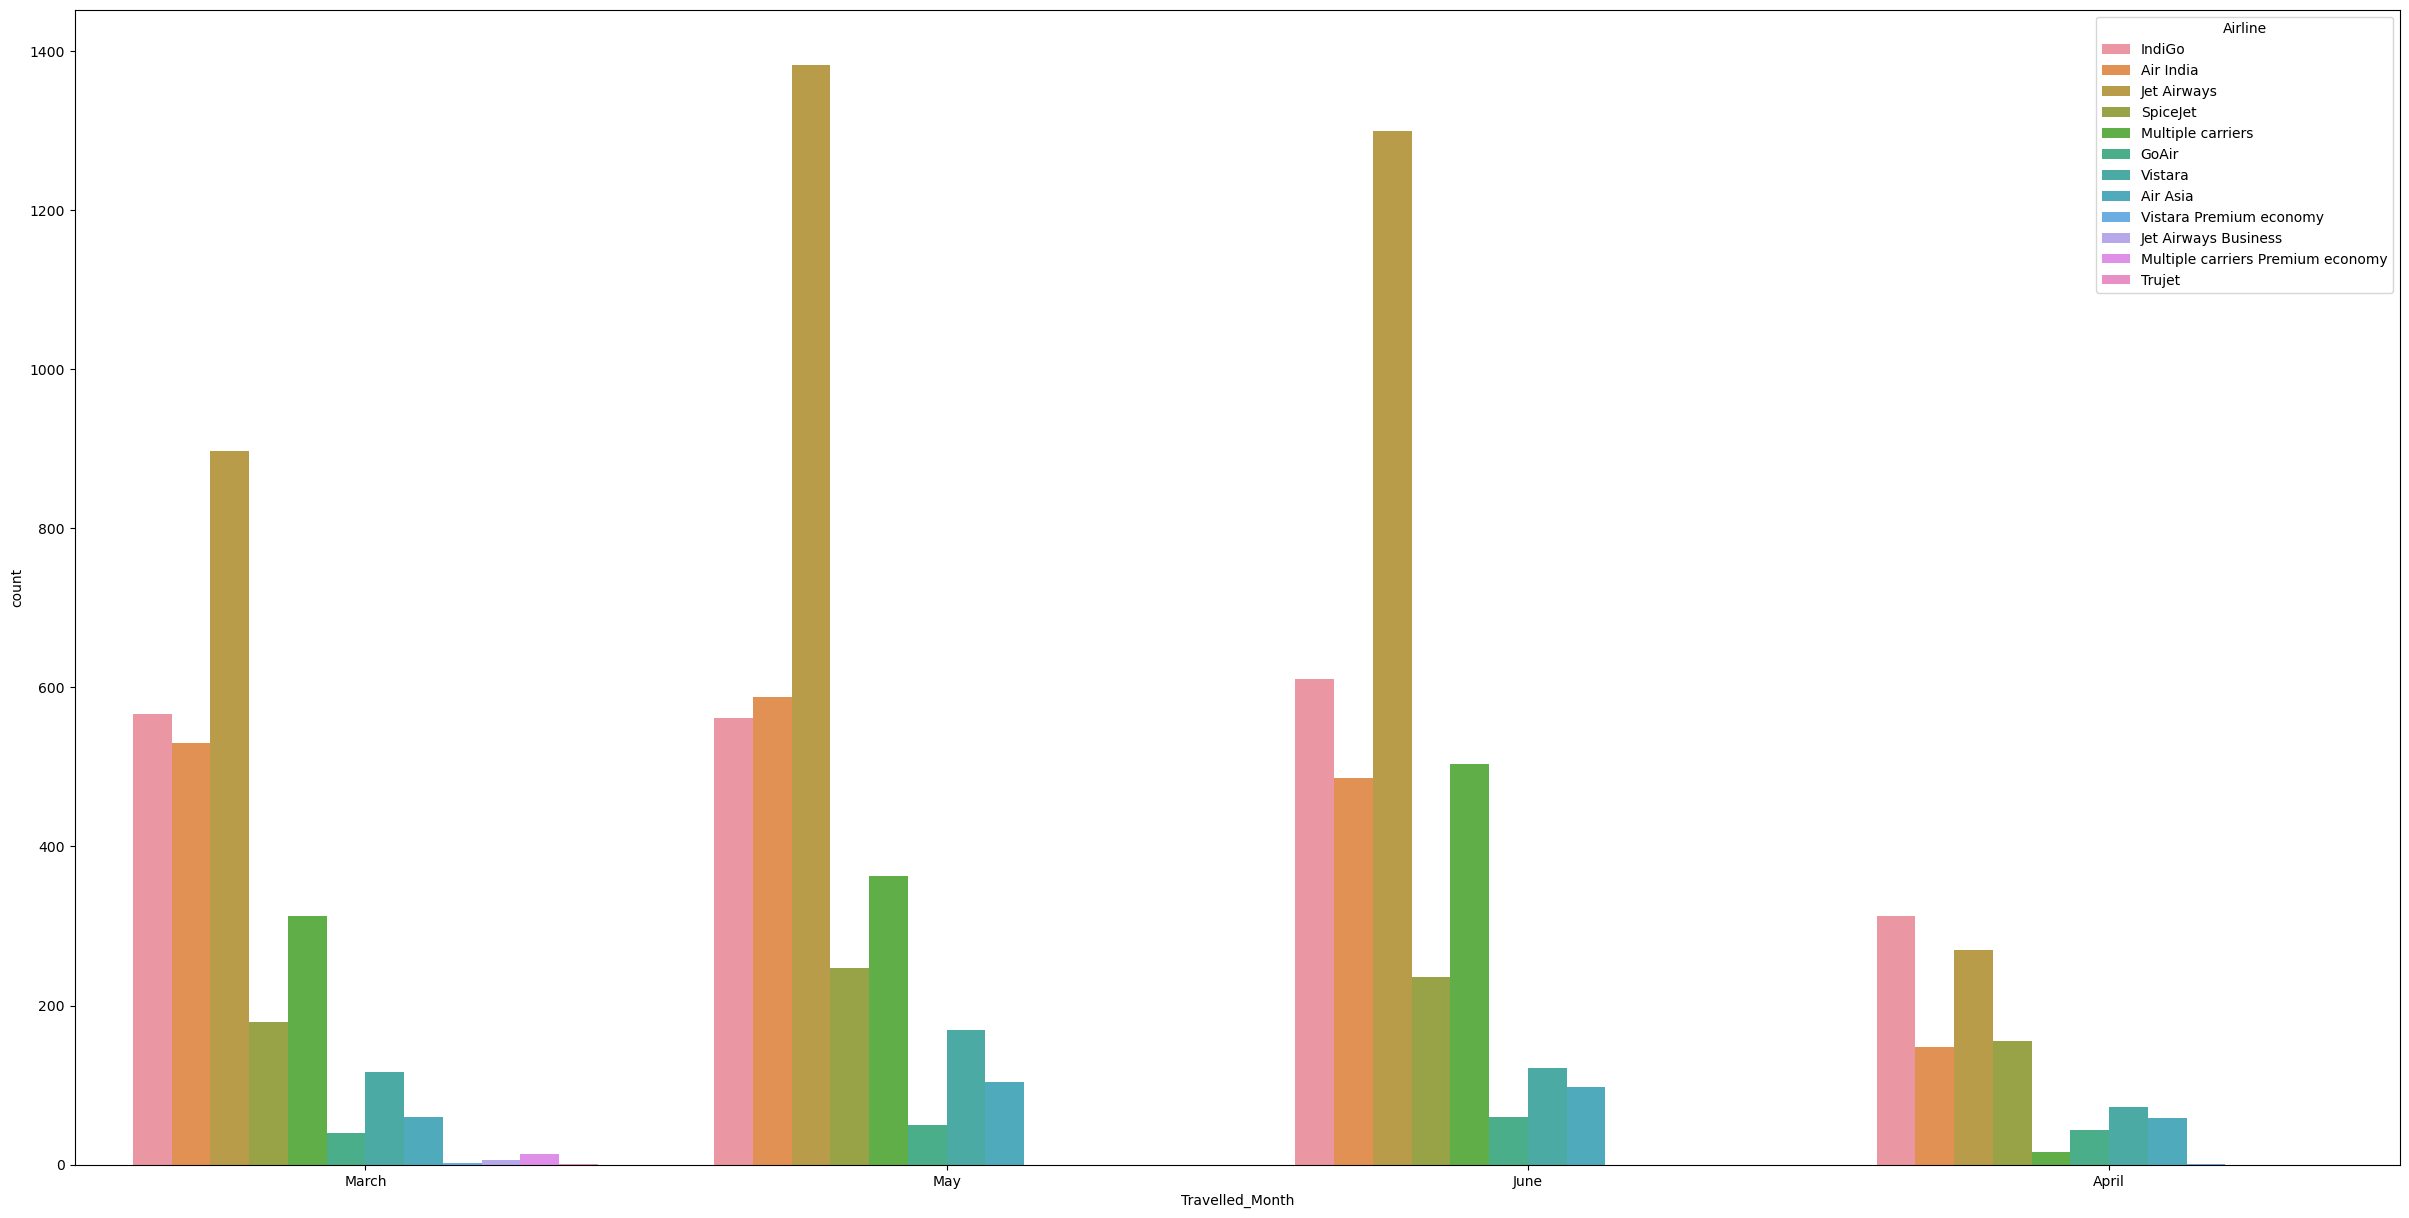

In [66]:
plt.figure(figsize=(30,15))
sns.countplot(x="Travelled_Month",data=airline_df,hue="Airline")
plt.show()   #only in april month more people travelled in indigo airlines,all other months more people travlled in jet airways


In [67]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  
0             No info   3897           March  
1             No info   7662             May  
2             No info  13882            June  
3             No info   6218             May  
4             No info  13302           March  
...               ...    ...             ...  
10678         No info   4107           April  
10679         No info   4145           April  
10680         No info   7229           April  
10681         No info  12648           March  
10682         No info  11753             May  

[10683 rows x 12 columns]

## Lets conform to which destination most people visited in May month

In [68]:
most_visited_destination=airline_df[airline_df["Travelled_Month"]=="May"]
most_visited_destination

Airline Date_of_Journey    Source Destination  \
1              Air India       1/05/2019   Kolkata    Banglore   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
9      Multiple carriers      27/05/2019     Delhi      Cochin   
13           Jet Airways       9/05/2019   Kolkata    Banglore   
19           Jet Airways      27/05/2019     Delhi      Cochin   
...                  ...             ...       ...         ...   
10670          Air India      12/05/2019   Kolkata    Banglore   
10673        Jet Airways      27/05/2019     Delhi      Cochin   
10676  Multiple carriers       1/05/2019     Delhi      Cochin   
10677           SpiceJet      21/05/2019  Banglore       Delhi   
10682          Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
9            DEL → BOM → COK    11:25         19:15   7h 50m            1   
13           CCU → BOM → BLR    21:10  09:20 10 May  12h 10m            1   
19           DEL → BOM → COK    16:00  12:35 28 May  20h 35m            1   
...                      ...      ...           ...      ...          ...   
10670  CCU → IXR → DEL → BLR    05:50         23:15  17h 25m            2   
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h            2   
10676        DEL → BOM → COK    10:20         19:00   8h 40m            1   
10677              BLR → DEL    05:55         08:35   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

                    Additional_Info  Price Travelled_Month  
1                           No info   7662             May  
3                           No info   6218             May  
9                           No info   8625             May  
13      In-flight meal not included   9663             May  
19      In-flight meal not included  12898             May  
...                             ...    ...             ...  
10670                       No info  11411             May  
10673                       No info  16704             May  
10676                       No info   9794             May  
10677  No check-in baggage included   3257             May  
10682                       No info  11753             May  

[3466 rows x 12 columns]

In [69]:
most_visited_destination["Destination"].value_counts()

Destination
Banglore     1470
Cochin       1239
Delhi         424
Hyderabad     202
Kolkata       131
Name: count, dtype: int64

In [70]:
most_visited_destination["Route"].value_counts()

Route
DEL → BOM → COK                682
CCU → BOM → BLR                577
BLR → DEL                      424
CCU → DEL → BLR                352
BOM → HYD                      202
                              ... 
CCU → BOM → PNQ → BLR            2
CCU → BOM → TRV → BLR            1
CCU → RPR → HYD → BLR            1
CCU → BBI → IXR → DEL → BLR      1
DEL--->BOM--->COk                1
Name: count, Length: 63, dtype: int64

In [71]:
most_visited_destination["Source"].value_counts()
#So many poeple in may month from kolkata travlled to banglore(may be vacation purpose banglore weather is quite good in any month)

Source
Kolkata     1470
Delhi       1239
Banglore     424
Mumbai       202
Chennai      131
Name: count, dtype: int64

In [72]:
most_visited_destination["Airline"].value_counts()

Airline
Jet Airways          1383
Air India             588
IndiGo                562
Multiple carriers     363
SpiceJet              247
Vistara               169
Air Asia              104
GoAir                  50
Name: count, dtype: int64

In [73]:
max(most_visited_destination["Price"])

34273

In [74]:
min(most_visited_destination["Price"])

1965

In [75]:
more_price=airline_df[airline_df["Price"]>30000]
more_price

Airline Date_of_Journey    Source Destination  \
396       Multiple carriers       1/03/2019     Delhi      Cochin   
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
1478            Jet Airways      18/03/2019  Banglore   New Delhi   
1629              Air India      01/03/2019  Banglore   New Delhi   
2099            Jet Airways      01/03/2019  Banglore   New Delhi   
2618            Jet Airways      18/03/2019  Banglore   New Delhi   
2693            Jet Airways      01/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
3700            Jet Airways      01/03/2019  Banglore   New Delhi   
5013            Jet Airways      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5439            Jet Airways      01/03/2019  Banglore   New Delhi   
5662            Jet Airways      01/03/2019  Banglore   New Delhi   
5719            Jet Airways      01/03/2019  Banglore   New Delhi   
6576            Jet Airways      01/03/2019  Banglore   New Delhi   
6991      Multiple carriers       9/05/2019     Delhi      Cochin   
7351   Jet Airways Business       3/03/2019     Delhi      Cochin   
7617      Multiple carriers       3/03/2019     Delhi      Cochin   
8598      Multiple carriers       9/03/2019     Delhi      Cochin   
9019            Jet Airways      01/03/2019  Banglore   New Delhi   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10052             Air India      24/03/2019   Kolkata    Banglore   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
396          DEL → BOM → COK    12:50         19:15   6h 25m            1   
657          BLR → BOM → DEL    05:45         10:45       5h            1   
1478         BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m            1   
1629   BLR → BOM → NAG → DEL    08:50  10:35 02 Mar  25h 45m            2   
2099         BLR → BOM → DEL    14:05         19:10    5h 5m            1   
2618         BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m            1   
2693         BLR → BOM → DEL    18:40  00:45 02 Mar    6h 5m            1   
2924         BLR → BOM → DEL    05:45         11:25   5h 40m            1   
3700         BLR → BOM → DEL    22:50  09:30 02 Mar  10h 40m            1   
5013         BLR → BOM → DEL    22:50  10:25 02 Mar  11h 35m            1   
5372         BLR → BOM → DEL    05:45         12:25   6h 40m            1   
5439         BLR → BOM → DEL    16:55         23:00    6h 5m            1   
5662         BLR → BOM → DEL    20:35  11:25 02 Mar  14h 50m            1   
5719         BLR → BOM → DEL    14:05         21:20   7h 15m            1   
6576         BLR → BOM → DEL    18:40  09:30 02 Mar  14h 50m            1   
6991         DEL → BOM → COK    12:50  01:30 10 May  12h 40m            1   
7351   DEL → ATQ → BOM → COK    20:05  04:25 04 Mar   8h 20m            2   
7617   DEL → IDR → BOM → COK    15:05  01:35 04 Mar  10h 30m            2   
8598   DEL → IDR → BOM → COK    15:05  01:35 10 Mar  10h 30m            2   
9019         BLR → BOM → DEL    22:50  11:25 02 Mar  12h 35m            1   
9715   DEL → ATQ → BOM → COK    20:05  04:25 07 Mar   8h 20m            2   
10052              CCU → BLR    20:45         23:20   2h 35m            0   
10364        BLR → MAA → DEL    09:45         14:25   4h 40m            1   
10439        BLR → BOM → DEL    18:40  09:00 02 Mar  14h 20m            1   

      Additional_Info  Price Travelled_Month  
396           No info  36983           March  
657           No info  52229           March  
1478          No info  54826           March  
1629          No info  31783           March  
2099          No info  36235           March  
2618          No info  54826           March  
2693          No info  35185           

In [76]:
more_price["Travelled_Month"].value_counts()
#In march itself 90% people travelled in airlines buying ticket >30k

Travelled_Month
March    23
May       1
Name: count, dtype: int64

In [77]:
result=airline_df[airline_df["Price"]<=12373]
result

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
3           IndiGo      12/05/2019   Kolkata    Banglore   
5         SpiceJet      24/06/2019   Kolkata    Banglore   
6      Jet Airways      12/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10677     SpiceJet      21/05/2019  Banglore       Delhi   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
5                  CCU → BLR    09:00         11:25   2h 25m            0   
6            BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m            1   
...                      ...      ...           ...      ...          ...   
10677              BLR → DEL    05:55         08:35   2h 40m            0   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

                    Additional_Info  Price Travelled_Month  
0                           No info   3897           March  
1                           No info   7662             May  
3                           No info   6218             May  
5                           No info   3873            June  
6       In-flight meal not included  11087           March  
...                             ...    ...             ...  
10677  No check-in baggage included   3257             May  
10678                       No info   4107           April  
10679                       No info   4145           April  
10680                       No info   7229           April  
10682                       No info  11753             May  

[8046 rows x 12 columns]

In [78]:
result=airline_df[airline_df["Price"]>12372]
result

Airline Date_of_Journey    Source Destination  \
2      Jet Airways       9/06/2019     Delhi      Cochin   
4           IndiGo      01/03/2019  Banglore   New Delhi   
7      Jet Airways      01/03/2019  Banglore   New Delhi   
15       Air India       3/03/2019     Delhi      Cochin   
18       Air India      12/06/2019     Delhi      Cochin   
...            ...             ...       ...         ...   
10650  Jet Airways      15/05/2019   Kolkata    Banglore   
10653  Jet Airways       1/05/2019   Kolkata    Banglore   
10668  Jet Airways       9/05/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   
10681      Vistara      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
7            BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m            1   
15     DEL → AMD → BOM → COK    16:40  19:15 04 Mar  26h 35m            2   
18     DEL → CCU → BOM → COK    20:15  19:15 13 Jun      23h            2   
...                      ...      ...           ...      ...          ...   
10650        CCU → DEL → BLR    09:35         18:00   8h 25m            1   
10653        CCU → BOM → BLR    14:05  12:00 02 May  21h 55m            1   
10668  DEL → JDH → BOM → COK    11:40         19:00   7h 20m            2   
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h            2   
10681              BLR → DEL    11:30         14:10   2h 40m            0   

                   Additional_Info  Price Travelled_Month  
2                          No info  13882            June  
4                          No info  13302           March  
7                          No info  22270           March  
15                         No info  14011           March  
18                         No info  13381            June  
...                            ...    ...             ...  
10650  In-flight meal not included  12384             May  
10653                      No info  14388             May  
10668                      No info  21219             May  
10673                      No info  16704             May  
10681                      No info  12648           March  

[2714 rows x 12 columns]

## Plot Duration and total stops

In [79]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  
0             No info   3897           March  
1             No info   7662             May  
2             No info  13882            June  
3             No info   6218             May  
4             No info  13302           March  
...               ...    ...             ...  
10678         No info   4107           April  
10679         No info   4145           April  
10680         No info   7229           April  
10681         No info  12648           March  
10682         No info  11753             May  

[10683 rows x 12 columns]

In [80]:
minutes=0
d="2h 50m"
print(len(d))
for i in range(len(d)):
    index_h=d.find("h")
    print(index_h)
    
    if d[i]=="h":
        minutes=minutes+60*int(d[i-1])
    if d[i]=="m":
        minutes=minutes+1*int(d[-4:-1])
print(minutes)
            
            

6
1
1
1
1
1
1
170


In [81]:
def func_minutes(d):
    ##2h 50m
    index_h=d.find("h")
    print(index_h)
    index_m=d.find("m")
    print(index_m)
    minutes=0
    min1=""
    for i in range(len(d)):
      if d[i]=="h" and  index_m==-1:
         minutes=minutes+int(d[0:i])
         return minutes
      if d[i]=="h" and index_m!=-1:
            minutes=minutes+int(d[0:i])
      if d[i]=="m" :
        r=d[(index_h)+2:index_m]
        if r>="31":
            minutes=minutes+1
            return minutes
        else:
            return minutes
        

        
airline_df["Duration_In_Hours"]=airline_df["Duration"].apply(func_minutes)

1
5
1
5
2
-1
1
5
1
5
1
5
2
6
2
5
2
6
1
5
2
6
1
5
1
5
2
6
1
5
2
6
1
5
2
6
2
-1
2
6
1
5
2
6
1
5
1
5
2
6
2
6
1
5
1
5
1
5
1
5
1
5
2
6
1
5
2
-1
1
5
2
6
1
5
1
5
1
5
2
6
2
5
1
5
2
5
1
5
2
-1
1
5
1
5
1
5
2
5
2
6
1
5
2
6
1
5
1
-1
1
5
2
6
2
5
1
5
1
5
2
5
2
6
2
6
2
6
2
6
1
5
2
6
1
5
1
5
2
6
1
5
1
5
2
6
1
5
2
6
1
-1
1
5
1
5
1
5
2
5
1
5
2
6
1
5
2
6
1
5
2
-1
2
6
1
5
2
6
2
6
2
-1
1
5
2
5
2
6
2
6
1
5
1
5
1
5
1
-1
1
5
2
6
2
6
2
6
1
5
2
-1
1
5
1
5
1
5
2
6
2
6
2
6
2
-1
1
5
2
6
2
6
1
5
2
6
2
5
2
6
1
5
2
6
1
5
1
5
2
5
2
6
1
5
2
6
2
6
2
-1
1
5
1
5
1
-1
2
6
1
5
1
5
2
-1
2
6
2
6
2
6
1
5
2
6
1
-1
1
5
1
5
1
5
2
6
2
6
1
5
2
6
1
5
1
5
1
5
2
6
1
5
2
6
2
6
2
6
2
6
1
5
2
6
2
6
2
6
1
5
2
6
1
5
1
5
2
6
1
5
1
5
1
5
1
5
2
6
1
4
2
6
1
5
2
6
2
6
1
4
2
6
2
-1
2
-1
2
6
1
5
1
5
2
-1
1
5
1
5
1
5
2
6
1
5
1
5
1
5
2
6
1
5
1
4
2
6
1
5
2
6
2
6
1
5
1
5
1
5
1
5
1
5
1
5
2
6
1
5
1
5
1
5
1
5
2
6
1
5
1
5
1
4
2
6
1
5
1
5
2
6
1
5
1
5
2
-1
1
5
2
6
1
5
1
5
2
6
2
6
2
6
1
5
1
5
1
5
2
6
1
5
1
5
2
6
1
5
1
5
2
6
2
6
1
5
2
6
1
5
1
5
2
-1
1
5
1
5


In [82]:
# def func_minutes(d):
#     index_h=d.find("h")
#     print(index_h)
#     index_m=d.find("m")
#     print(index_m)
#     minutes=0
#     min1=""
#     for i in range(len(d)):
#       if d[i]=="h":
#          minutes=minutes+60*int(d[i-1])
#       if d[i]=="m":
#           for j in range((index_h)+2,index_m):
#              min1=min1+d[j]
#              print(min1)
#           minutes=minutes+int(min1)
#     return minutes
        
# airline_df["Duration_In_Minutes"]=airline_df["Duration"].apply(func_minutes)

In [83]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  Duration_In_Hours  
0             No info   3897           March                  3  
1             No info   7662             May                  7  
2             No info  13882            June                 19  
3             No info   6218             May                  5  
4             No info  13302           March                  5  
...               ...    ...             ...                ...  
10678         No info   4107           April                  2  
10679         No info   4145           April                  3  
10680         No info   7229           April                  3  
10681         No info  12648           March                  3  
10682         No info  11753             May                  8  

[10683 rows x 13 columns]

In [84]:
airline_df[airline_df["Additional_Info"]=="No info"]
airline_df.shape

(10683, 13)

In [85]:
def change_case(d):
    if d=="No Info":
        return "No info"
    else:
        return d
    
airline_df["Additional_Info"]=airline_df["Additional_Info"].apply(change_case)

In [86]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  Duration_In_Hours  
0             No info   3897           March                  3  
1             No info   7662             May                  7  
2             No info  13882            June                 19  
3             No info   6218             May                  5  
4             No info  13302           March                  5  
...               ...    ...             ...                ...  
10678         No info   4107           April                  2  
10679         No info   4145           April                  3  
10680         No info   7229           April                  3  
10681         No info  12648           March                  3  
10682         No info  11753             May                  8  

[10683 rows x 13 columns]

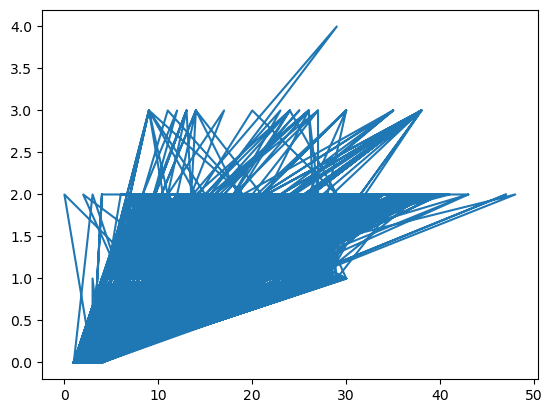

In [87]:
plt.plot(airline_df["Duration_In_Hours"],airline_df["Total_Stops"])
plt.show()

In [88]:
airline_df[airline_df["Duration_In_Hours"]>=40]

Airline Date_of_Journey    Source Destination  \
1067   Jet Airways       3/03/2019     Delhi      Cochin   
5953   Jet Airways      21/03/2019     Delhi      Cochin   
6321     Air India      01/03/2019  Banglore   New Delhi   
7906     Air India      24/03/2019   Kolkata    Banglore   
8409   Jet Airways      21/03/2019     Delhi      Cochin   
9848     Air India      01/03/2019  Banglore   New Delhi   
10326    Air India      03/03/2019  Banglore   New Delhi   
10456  Jet Airways       6/03/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
1067   DEL → IDR → BOM → COK    05:25  04:25 05 Mar      47h            2   
5953   DEL → IDR → BOM → COK    10:20  04:25 23 Mar   42h 5m            2   
6321   BLR → BOM → AMD → DEL    08:50  23:55 02 Mar   39h 5m            2   
7906   CCU → GAU → DEL → BLR    05:55  23:15 25 Mar  41h 20m            2   
8409   DEL → JAI → BOM → COK    09:40  04:25 23 Mar  42h 45m            2   
9848   BLR → BOM → AMD → DEL    08:50  23:55 02 Mar   39h 5m            2   
10326  BLR → CCU → GAU → DEL    05:50  22:10 07 Mar  40h 20m            2   
10456  DEL → AMD → BOM → COK    19:10  18:50 08 Mar  47h 40m            2   

      Additional_Info  Price Travelled_Month  Duration_In_Hours  
1067          No info  20064           March                 47  
5953          No info  11664           March                 43  
6321          No info  17135           March                 40  
7906          No info  13990           March                 41  
8409          No info  12819           March                 43  
9848          No info  17135           March                 40  
10326         No info  11791           March                 40  
10456         No info  20694           March                 48

In [89]:
airline_df.shape

(10683, 13)

In [90]:
##I am droping Duration_In_Minutes column --->It is duplicated,so not needed
airline_df.drop("Duration_In_Minutes",axis=1,inplace=True)

KeyError: "['Duration_In_Minutes'] not found in axis"

In [ ]:
airline_df

In [ ]:
airline_df.shape     #Duration_In_Minutes column deleted

In [ ]:
##not getting good visualization with huge data I will pick only some rows 
picked_rows=airline_df.iloc[:5]

In [ ]:
picked_rows

In [ ]:
plt.plot(picked_rows["Duration_In_Hours"],picked_rows["Total_Stops"])
plt.show()

In [ ]:
correlation_matrix = airline_df[["Duration_In_Hours", "Total_Stops"]].corr()
print(correlation_matrix)

#So we found there is some good correlation between the columns the duration and total_stops in the airlines dataset


In [ ]:
airline_df

## 

In [ ]:
airline_df["Additional_Info"].unique()

In [ ]:
airline_df[airline_df.duplicated()]

In [ ]:
airline_df[(airline_df["Airline"]=="Jet Airways") & (airline_df["Source"]=="Delhi") & (airline_df["Destination"]=="Cochin")&
          (airline_df["Total_Stops"]==2) & (airline_df["Additional_Info"]=="No info") &(airline_df["Travelled_Month"]=="May")&
          (airline_df['Duration_In_Hours']==15)]

### I have found there are 220 duplicate records found in the dataset so lets remove them,as a part of eda

In [ ]:
##deleting duplicate records from the dataset
airline_df.drop_duplicates(inplace=True)

In [ ]:
airline_df

In [ ]:
airline_df[(airline_df["Airline"]=="Jet Airways") & (airline_df["Source"]=="Delhi") & (airline_df["Destination"]=="Cochin")&
          (airline_df["Total_Stops"]==2) & (airline_df["Additional_Info"]=="No info") &(airline_df["Travelled_Month"]=="May")&
          (airline_df['Duration_In_Hours']==15)]

##Duplicates are removed from the dataset succesfully


In [ ]:
airline_df.shape

In [ ]:
airline_df

In [ ]:
##lets make our data more clean by changing little bit in depature and arrival time
def dep_time(d):
    return  d[0:6]
    
airline_df["Dep_Time"]=airline_df["Dep_Time"].apply(dep_time)
airline_df["Arrival_Time"]=airline_df["Arrival_Time"].apply(dep_time)

In [ ]:
airline_df

#changed the time to hour:Minute format

In [ ]:
plt.figure(figsize=(35,10))
plt.bar(x=airline_df["Airline"],height=airline_df["Price"])
plt.show()    ##when we dont group by the things and plot bar graph,by default max price of particular unique value is dispalyed 

In [ ]:
jet_airways=airline_df[airline_df["Airline"]=="Jet Airways"]
jet_airways

In [ ]:
airline_df["Airline"].value_counts()

In [ ]:
np.max(jet_airways["Price"])

In [ ]:
indigo=airline_df[airline_df["Airline"]=="IndiGo"]
indigo

In [ ]:
np.max(indigo["Price"])

In [ ]:
##lets plot the bar graph with calculation of avg price fo each airways
group_airline=airline_df.groupby("Airline").aggregate(avg_Price=("Price",np.mean))

In [ ]:
group_airline

In [ ]:
plt.figure(figsize=(35,10))
plt.bar(x=group_airline.index.values,height=group_airline["avg_Price"])
plt.show()    ##when we dont group by the things and plot bar graph,by default max price of particular unique value is dispalyed 

## So,now your friend came to you and told you he want go to banglore to attend a meeting.Now he is residing in delhi.Select the best and affordable flight and mention you some specifcations

1)Price he can afford-less than 10k
2)In flight meal should be provided
3)He cant wait for more time in middle of the airports

##conclusion no flights available from delhi banglore

**lets take other case anyhow your friend reached banglore now he want to come back to delhi suggest him/her a flight**
he/she wanted to travel only night times


## I will suggest him/her to take indigo flight based on the below analysis

In [ ]:
airline_df[airline_df["Price"]<10000]   #we got 6270 records by considering first specification

In [ ]:
airline_df[(airline_df["Price"]<10000) &(airline_df["Source"]=="Delhi")&
          airline_df["Destination"]=="Banglore"]   #No flights from delhi to banglore

In [ ]:
x=airline_df[(airline_df["Destination"]=="Delhi") & (airline_df["Source"]=="Banglore") & (airline_df["Price"]<10000) & 
          (airline_df["Additional_Info"]!='In-flight meal not included')& (airline_df["Dep_Time"]>="10.00") &
            (airline_df["Additional_Info"]!='No check-in baggage included')]
x

In [ ]:
x["Airline"].value_counts()

In [ ]:
max(x["Price"])

In [ ]:
min(x["Price"])

In [ ]:
y=x[x["Price"]<=3500]
y

In [ ]:
y["Airline"].value_counts()
airline_df["Airline"].value_counts()

##so after checking the analysis I prefer him indigo flight

In [ ]:
y=x[(x["Price"]<=3500) & (x["Airline"]=="IndiGo")]
y


In [ ]:
airline_df["Destination"].value_counts()

In [ ]:
airline_df["Additional_Info"].unique()

In [ ]:
airline_df[airline_df["Additional_Info"]=="Red-eye flight"]

In [ ]:
airline_df[airline_df["Additional_Info"]=="Change airports"]

In [ ]:
airline_df[airline_df["Dep_Time"]=="23:25"]

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="Airline",data=x)
plt.show()

In [ ]:
y

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="Airline",data=y)
plt.show()

##  In which month flight prices are low   -->march month

## can get min price ticket in march month  and spicejit airways offers low ticket prices

In [ ]:
airline_df

In [ ]:
x=airline_df[airline_df["Travelled_Month"]=="March"]    
x
##March less price-1765   -->all others same price-1965

In [ ]:
min(x["Price"])

In [ ]:
x=airline_df[(airline_df["Travelled_Month"]=="March") &(airline_df["Price"]<=2000)]    
x
##March less price-1765   -->all others same price-1965

In [ ]:
## People travelled in march with high ticket price
airline_df[(airline_df["Travelled_Month"]=="March") & (airline_df["Price"]>=50000)]

In [ ]:
airline_df

In [ ]:
airline_df.describe(include=object)

In [ ]:
airline_df[airline_df.duplicated()]

In [ ]:
airline_df.drop_duplicates(inplace=True)

In [ ]:
airline_df

In [ ]:
airline_df

In [ ]:
airline_df[airline_df.duplicated("Airline")]

In [ ]:
airline_df[airline_df.duplicated(["Airline","Source"])]

In [ ]:
a=airline_df.drop_duplicates(subset="Airline")
a

In [ ]:
airline_df

In [ ]:
##value counts

In [ ]:
airline_df.columns

In [ ]:
airline_df.isna().sum()

In [ ]:
airline_df["Airline"].value_counts(dropna=False)     #if nan is present it will display count of nan values also by default dropna=True if we dont specify


## Distplot

In [ ]:
import seaborn as sns
airline_df.columns


In [ ]:
sns.displot(airline_df["Price"],bins=8,kde=True,fill=True)

In [ ]:
help(sns.distplot)

In [ ]:
airline_df[airline_df["Price"]<=11500].shape

In [ ]:
sns.kdeplot(airline_df["Price"],shade=True,fill=True)

In [ ]:
help(sns.kdeplot)

In [ ]:
airline_df

In [ ]:
airline_df.describe()

In [ ]:
sns.boxplot(airline_df["Price"])

In [ ]:
Price1=airline_df["Price"].sort_values()
Price1

In [ ]:
q1=Price1.quantile(0.25)
q1

In [ ]:
q3=airline_df["Price"].quantile(0.75)
q3


In [ ]:
q2=airline_df["Price"].quantile(0.50)
q2


In [ ]:
q1=airline_df["Price"].quantile(0.25)
q1

In [ ]:
q3=airline_df["Price"].quantile(0.75)
q3

In [ ]:
q2=airline_df["Price"].quantile(0.50)
q2


In [ ]:
##Finding inter quartile range
IQR=q3-q1
IQR

In [ ]:
lower_bound=q1-1.5*IQR    ###1.5 is whis value
upper_bound=q3+1.5*IQR
print(lower_bound,upper_bound)

In [ ]:
sns.boxplot(airline_df["Price"],whis=5)    ##we can change the whis value by default it is 1.5-->is measured by drawing box plot

## capping method

In [ ]:
## Any value below the lower limit is set to the lower limit
##and any value above the upper limit is set to the upper limit.
##A threshold value is a predetermined point or level used as a reference or boundary in decision-making
##IN above case threshold values are lower and upper bound

In [ ]:
new_price = airline_df["Price"].clip(lower=lower_bound, upper=upper_bound)
new_price

In [ ]:
box_plot=sns.boxplot(new_price)
box_plot

In [ ]:
a=airline_df[(airline_df["Price"]>=lower_bound) & (airline_df["Price"]<=upper_bound)]
a

In [ ]:
a[a["Price"]>=23002]       ##no records more than 23002 so outliers not there in above dataset

In [ ]:
##10463-10369=94(outliers removed fetched)

In [ ]:
##countplot

In [ ]:
sns.countplot(airline_df["Duration_In_Hours"])

In [ ]:
airline_df["Duration_In_Hours"].unique()

In [ ]:
airline_df.query("Price>=40000")   #these all people travlled in march month with more than 40k price ticket

In [ ]:
airline_df

In [ ]:
corr_val=airline_df[["Price","Duration_In_Hours","Total_Stops"]]
corr_val

In [ ]:
corr_val.corr()

In [ ]:
sns.heatmap(corr_val.corr(),annot=True,cmap="coolwarm")

In [ ]:
airline_df

In [ ]:
help(sns.heatmap)

In [91]:
airline_df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m            0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m            2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h            2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m            1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m            1   
...                      ...      ...           ...      ...          ...   
10678              CCU → BLR    19:55         22:25   2h 30m            0   
10679              CCU → BLR    20:45         23:20   2h 35m            0   
10680              BLR → DEL    08:20         11:20       3h            0   
10681              BLR → DEL    11:30         14:10   2h 40m            0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m            2   

      Additional_Info  Price Travelled_Month  Duration_In_Hours  
0             No info   3897           March                  3  
1             No info   7662             May                  7  
2             No info  13882            June                 19  
3             No info   6218             May                  5  
4             No info  13302           March                  5  
...               ...    ...             ...                ...  
10678         No info   4107           April                  2  
10679         No info   4145           April                  3  
10680         No info   7229           April                  3  
10681         No info  12648           March                  3  
10682         No info  11753             May                  8  

[10683 rows x 13 columns]

In [93]:
plt.plot(airline_df["Price"])

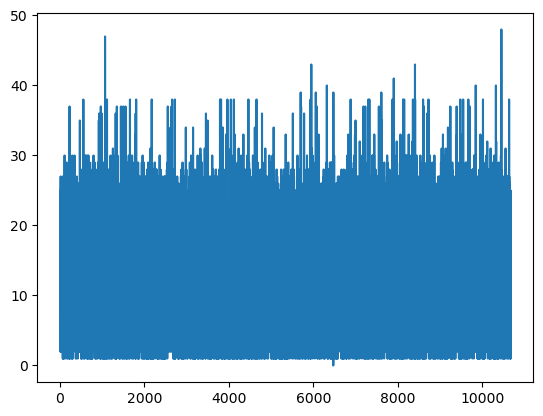

In [94]:
plt.plot(airline_df["Duration_In_Hours"])

In [100]:
airline_df[airline_df["Duration_In_Hours"]>45]

Airline Date_of_Journey Source Destination                  Route  \
1067   Jet Airways       3/03/2019  Delhi      Cochin  DEL → IDR → BOM → COK   
10456  Jet Airways       6/03/2019  Delhi      Cochin  DEL → AMD → BOM → COK   

      Dep_Time  Arrival_Time Duration  Total_Stops Additional_Info  Price  \
1067     05:25  04:25 05 Mar      47h            2         No info  20064   
10456    19:10  18:50 08 Mar  47h 40m            2         No info  20694   

      Travelled_Month  Duration_In_Hours  
1067            March                 47  
10456           March                 48